# LEPL1106, Devoir 2 : convolution et réponse impulsionnelle

## 0) Introduction

On va s'intéresser pour ce devoir à l'opération de convolution $*$ (en temps discret), et plus particulièrement, à son utilisation pour modéliser la sortie $y[n]$ d'un système $H$ dont la réponse impulsionnelle est $h[n]$. Pour une entrée $x[n]$, on a ainsi

$$y[n] = (x * h)[n] = \sum_k x[n-k] h[k].$$

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\thoma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tailles de police et couleurs utilisées avec la librairie matplotlib
legendsize = 14
titlesize = 14
labelsize = 16
colors = {'orange':[0.894,0.424,0.039],'red':[0.753,0.0,0.0],
          'violet':[0.580,0.0,0.827],'green':[0.437,0.576,0.235],
          'lightgreen':[0.0,0.9,0.0],'darkgreen':[0.0,0.5,0.0],
          'blue':[0.0,0.439,0.753],'cyan':[0.0,0.9,1.0],
          'white':[1.0,1.0,1.0], 'black':[0.0,0.0,0.0],
          'grey':[0.5,0.5,0.5],'lightgrey':[0.7,0.7,0.7],
          'maroon':[0.5,0.0,0.0],'brown':[0.545,0.271,0.075],
          'gold':[0.812,0.710,0.231],'pink':[1.0,0.078,0.576]}

Dans [NumPy](http://www.numpy.org/), une implémentation possible$^1$ de la convolution est donnée par `np.convolve` :

$^1$*Un petit teaser pour les plus curieux d'entre vous : `np.convolve` implémente la convolution de manière "naive" en appliquant directement la définition ci-dessus. Pour deux signaux de taille égale $N$ (si `x.size = h.size = N`), cette implémentation a une complexité algorithmique de $\mathcal O(N^2)$, ce peut être assez lourd pour $N$ grand (ci-dessous, ce souci n'apparaitra pas car les `h` que nous considérons ont un support très court). Heureusement, grâce au **théorème de la convolution** (que vous verrez plus tard dans le cours) et l'algorithme FFT qui calcule la **transformée de Fourier discrète**  (idem) de façon très efficace, il existe une autre implémtation, disponible via `scipy.signal.fftconvolve` du package `scipy` (SCIentific PYthon), qui a complexité $\mathcal O(N \log(N))$, ce qui est bien plus rapide pour les grandes valeurs de $N$. On reviendra là-dessus plus tard, quand nous étudierons le **filtrage** des signaux.*


In [3]:
help(np.convolve)

Help on function convolve in module numpy:

convolve(a, v, mode='full')
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    The convolution operator is often seen in signal processing, where it
    models the effect of a linear time-invariant system on a signal [1]_.  In
    probability theory, the sum of two independent random variables is
    distributed according to the convolution of their individual
    distributions.
    
    If `v` is longer than `a`, the arrays are swapped before computation.
    
    Parameters
    ----------
    a : (N,) array_like
        First one-dimensional input array.
    v : (M,) array_like
        Second one-dimensional input array.
    mode : {'full', 'valid', 'same'}, optional
        'full':
          By default, mode is 'full'.  This returns the convolution
          at each point of overlap, with an output shape of (N+M-1,). At
          the end-points of the convolution, the signals do not overlap
          co

## 1) Convolution

Comme première tâche cette semaine, nous vous demandons d'écrire une fonction qui retourne la convolution entre deux signaux $x[n]$ et $h[n]$.

> Trop facile, `np.convolve` et c'est plié !
>
> --- étudiant anonyme

Oui, mais : on vous demande de faire particulièrement attention aux *indices* qui correspondent au résultat de la convolution ! Plus précisément donc, on vous demande d'écrire la fonction `convolution(x,nx,h,nh)`, où 

* Le numpy array `x` contient les valeurs du signal $x[n]$ évaluées aux indices correspondant dans `nx` (un numpy array d'entiers consécutifs). **Remarque** on suppose que $x[n] = 0$ en dehors des indices fournis dans `nx`. 
* Similairement, l'array `h` représente le signal $h[n]$ aux indices dans `nh`.

Par exemple, le signal "triangle" de "base" $2T-1$, donné par $h[n] = r[n + T] - 2r[n] + r[n-T]$, sera représenté ainsi :



h  :  [1 2 3 4 3 2 1]
nh :  [-3 -2 -1  0  1  2  3]


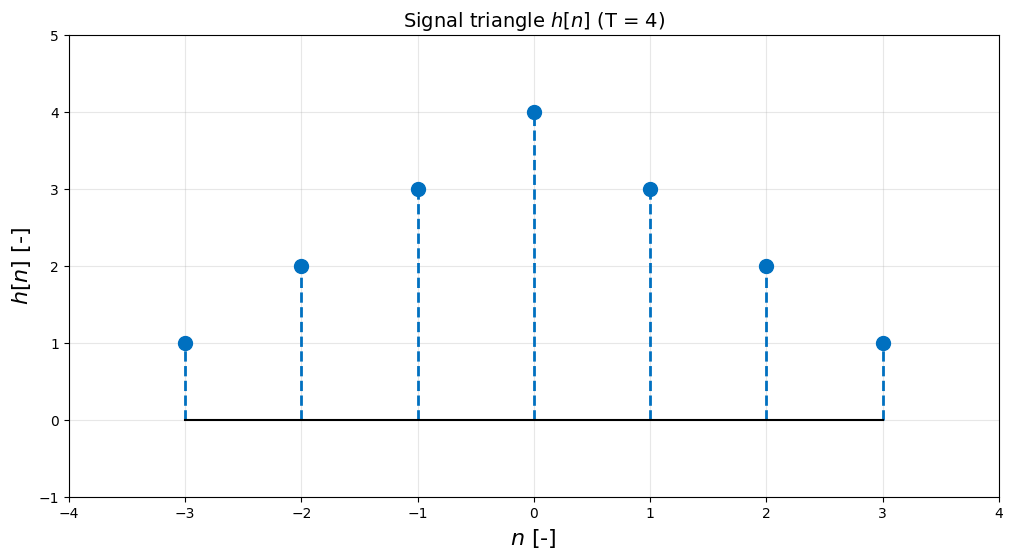

In [4]:
T = 4
h = np.append(np.arange(1,T),np.arange(T,0,-1))
nh = np.arange(-(T-1),T)

print("h  : ",h)
print("nh : ",nh)

# N.B.: 
# Nous vous fournissons ici des plots que nous considérons comme corrects.
# Lorsque nous vous demandons des plots, faites bien attention à respecter les consignes spécifiques à chaque figure.
# Si vous utilisez les variables définies au début du notebook (ex : labelsize), veillez à les re-définir sur INGInious.

plt.figure(figsize=(12,6))
markerline, stemlines, baseline = plt.stem(nh,h)

plt.setp(baseline,color=colors['black'])
plt.setp(stemlines,color=colors['blue'],linewidth=2,linestyle='--')
plt.setp(markerline,color=colors['blue'],marker='o',markersize=10)

plt.title(f"Signal triangle $h[n]$ (T = {T})",fontsize=titlesize)
plt.xlabel(r'$n$ [-]',fontsize=labelsize)
plt.ylabel(r'$h[n]$ [-]',fontsize=labelsize)
plt.grid('on',alpha=0.3)
plt.xlim((-4,4))
plt.ylim((-1,5))
plt.show()

Votre fonction `convolution` doit renvoyer deux vecteurs (numpy array), `y` et `ny`, où `y` contient les valeurs du signal $y[n]$ évalué aux indices retournés dans `ny` (attention à bien retourner un *tuple* `(y,ny)`). Le vecteur `ny` est donc un vecteur d'entiers consécutifs, qui contient toutes les valeurs de $n$ où la convolution peut être non-nulle.

In [5]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS

def convolution(x,nx,h,nh):
    """
    A COMPLETER
    """

    y = np.zeros(x.size + h.size - 1)
    ny = np.zeros(y.size)

    a = nh.size//2
    ny[0] =min(nx[0],nh[0]) - a  #création de l'array contenant les points auquels on à des signaux
    for i in range(ny.size):
        ny[i] = ny[0] + i
        ny[i] = int(ny[i])
    
    y = np.convolve(x,h) #convolution entre x et h


    return (y,ny)

In [6]:
## CELLULE DE TEST (1/2)

# Créer un signal avec quelques deltas
nx = np.arange(-10,21)
x  = np.zeros(nx.size)
deltas = [-7, 2, 13, 18] # position des deltas
x[deltas - nx[0]] = 1

print("Taille de x:  ", x.size, "\tet de nx :", nx.size)
print("Taille de h:  ", h.size, "\tet de nh :", nh.size)


(y,ny) = convolution(x,nx,h,nh)

print("Taille de y:  ", y.size, "\tet de ny :", ny.size)

Taille de x:   31 	et de nx : 31
Taille de h:   7 	et de nh : 7
Taille de y:   37 	et de ny : 37


In [7]:
def plot_convolution(x,nx,y,ny,fig_name):
    # Calcul de la convolution
    z = np.convolve(x, y)
    
    #création de l'array contenant les points auquels on à des signaux    
    nz = np.zeros(z.size) 
    a = ny.size//2
    nz[0] =min(nx[0],ny[0]) - a  
    for i in range(nz.size):
        nz[i] = nz[0] + i
        nz[i] = int(nz[i])

    # Création de la figure
    plt.figure(figsize=(15,8))

    # Affichage de z[n]
    plt.stem(nz, z, use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('z[n]')
    plt.title('Convolution de x et y')

    plt.show()

    plt.savefig(fig_name + '.png', bbox_inches='tight')

    return
    

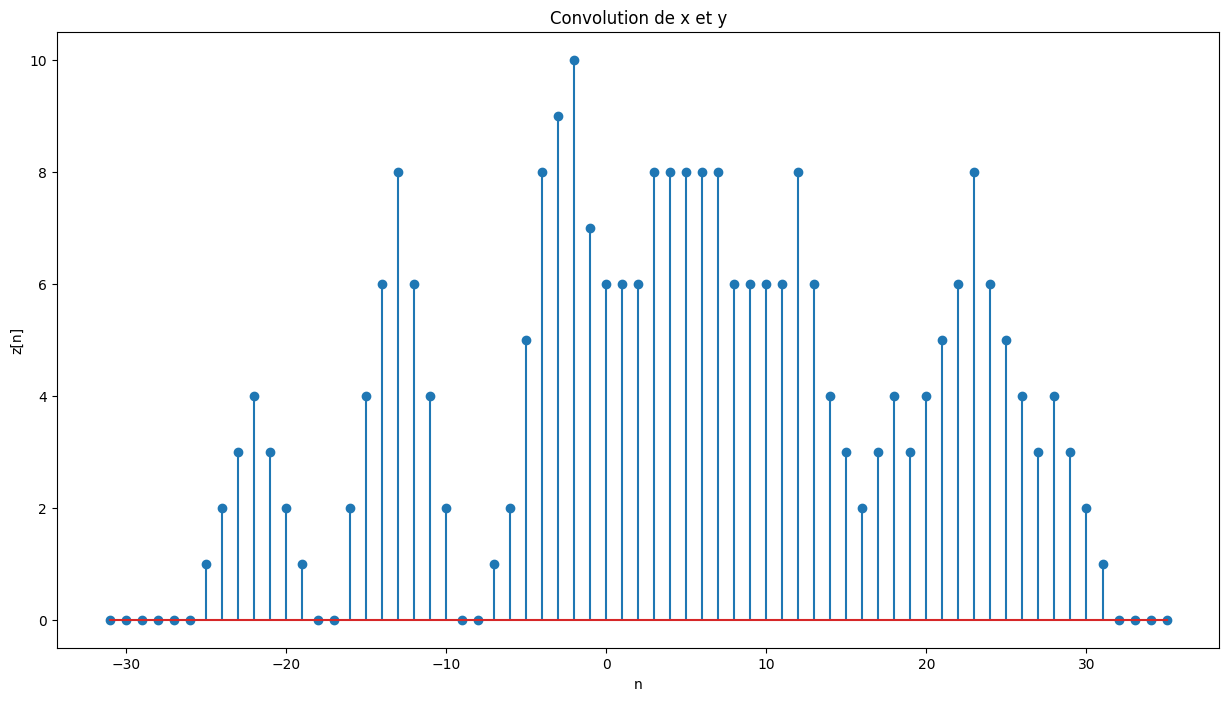

<Figure size 640x480 with 0 Axes>

In [8]:
## CELLULE DE TEST

plot_convolution(x,nx,y,ny,'plot_convolution')

# La figure s'affichera ci-dessous :

## 2) La sortie d'un système par convolution
Considérons maintenant le tout premier *système* des devoirs de ce cours : la "moyenne glissante" (*moving average*), souvent utilisée pour "lisser" des signaux qui présentent de fortes fluctuations (comme on le verra plus tard dans le cours, c'est un "filtre passe-bas"). Plus précisément, pour une entrée $x[n]$, la sortie $y[n]$ du système "moyenne glissante" de taille $M > 0$ renvoie la moyenne des $M$ derniers échantillons, i.e.,

$$y[n] = \frac{x[n]+x[n-1]+...+x[n-(M-1)]}{M}.$$

La *réponse impulsionnelle* de ce systeme est 
$$h[n] = \frac{1}{M} (u[n] - u[n - M]).$$
 
En effet, on peut verifier (faites-le!) à partir des deux équations précédentes que $y[n] = (x * h)[n]$, où $*$ est le *produit de convolution*.

On vous demande d'écrire `moving_average(x,M)` qui implémente ce système : pour un signal $x$ (un numpy array de taille $N$ correspondant aux valeurs $x[0], x[1], ..., x[N-1]$) et une taille de fenêtre $M$, calculez la sortie $y$ définie ci-dessus (un numpy array de taille $N$ correspondant aux valeurs $y[0], y[1], ..., y[N-1]$, **de même taille que l'entrée $x$**, évaluée aux mêmes indices). 

Il vous faudra donc
1. calculer $h$ (par exemple, grâce à votre fonction `window` où $n_0 = 0$ et $n_1 = M$), évaluée aux indices $n = 0, 1, ..., L-1$ pour une taille $L \geq M$.
2. puis d'utiliser `convolution` pour calculer le produit de convolution $y = x * h$. Attention à bien respecter la contrainte vis-à-vis des valeurs qu'on souhaite conserver.

(précision : on suppose que les valeurs précédentes de $x$ sont nulles, i.e. $x[n] = 0$ pour $n < 0$)

In [9]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
# ATTENTION : SI VOUS UTILISEZ VOTRE FONCTION convolution DANS CETTE CELLULE, 
#    VOUS DEVEZ REDEFINIR convolution DANS LA FONCTION moving_average POUR LA SOUMISSION INGINIOUS

def moving_average(x,M):
    # Calcul de la réponse impulsionnelle
    h = 1/M * (np.arange(M) < M)  # utilisation d'un masque booléen
    
    # Calcul de la sortie
    y = np.convolve(x, h)[:len(x)]  # on tronque la sortie pour conserver la taille de x
    
    return y

### Une application pour tester notre fonction

Considérons comme signal $x$ le prix de l'électricité en Belgique sur le marché *day-ahead*. Sur ce marché, les acteurs peuvent vendre et acheter de l'énergie électrique qui sera produite et consommée le lendemain. A chaque heure, le prix de l'électricité (en [€/MWh]) est déterminé en tenant compte des courbes de prévision de l'offre et de la demande. 
Les données fournies avec ce devoir décrivent le prix fixé sur le marché *day-ahead* à chaque heure et chaque jour du mois d'août 2022. Ce prix variant fortement au cours d'une journée, nous vous proposons d'étudier le signal lissé par une moyenne glissante de taille 24.

*Attention à bien télécharger le fichier "elec_prices.npy" sur Moodle et à le placer dans un sous-dossier "data", lui-même placé dans le même dossier que ce notebook*

In [10]:
x = np.load("data/elec_prices.npy")  # Prix de l'électricité à chaque heure entre le 01/08/2022 et le 31/08/2022 (https://www.elia.be/en/grid-data/transmission/day-ahead-reference-price)
N = len(x)
h = np.linspace(0,(N-1)/24,N) # Vecteur temps en heures
y = moving_average(x,M=24) # Moyenne quotidienne


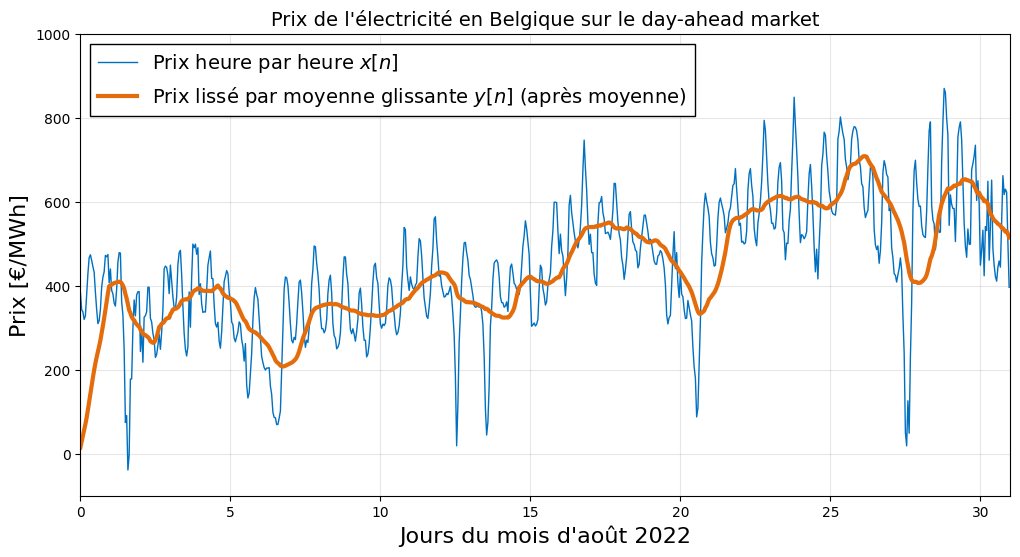

In [11]:

plt.figure(figsize=(12,6))
plt.plot(h,x,label=r"Prix heure par heure $x[n]$",linewidth=1,color=colors['blue'])
plt.plot(h,y,label=r"Prix lissé par moyenne glissante $y[n]$ (après moyenne)",linewidth=3,color=colors['orange'])
plt.title("Prix de l'électricité en Belgique sur le day-ahead market",fontsize=titlesize)
plt.xlabel("Jours du mois d'août 2022",fontsize=labelsize)
plt.ylabel("Prix [€/MWh]",fontsize=labelsize)
plt.legend(fontsize=legendsize,framealpha=1,fancybox=False,edgecolor='k')
plt.grid('on',alpha=0.3)
plt.xlim((0,31)); plt.ylim((-100,1000))
plt.show()

In [12]:
import matplotlib
matplotlib.__version__

'3.5.1'